<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-141-mna/blob/main/Actividad_de_semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

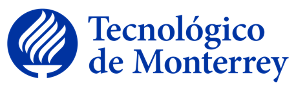

---
**Maestría en Inteligencia Artificial**
 
Ciencia y Analítica de Datos

Actividad Semanal – 4

---

Profesor Titular: Jobish Vallikavungal Devassia

Profesor Asistente: Maricarmen Vázquez Rojí

Tutor: César Adolfo Ortega Vivas

---

Alumnos:

Jorge Arturo Federico Rivera: A01250724

César Flores Vivanco: A01173318

11 de octubre de 2022

<div style="page-break-after: always;"></div>

Parte 1
---

Se importan los datos a Python desde el URL proveído en la actividad

In [47]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

csv_url = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

df = pd.read_csv(csv_url, index_col=0)
y = df.loc[:, "Y"]
# print(y)
df.drop("Y", inplace=True, axis=1)

Se filtran y preparan los datos como visto en las semanas anteriores: se revisa si son válidos los datos y se procede a eliminar los registros con valores NA.

In [48]:
OPTIONS = {
    "X2": [1, 2],
    "X3": [1, 2, 3, 4],
    "X4": [1, 2, 3],
    "X6": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "X7": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "X8": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "X9": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "X10": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "X11": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
}

filtered_df = df.copy()

for column in OPTIONS.keys():
  filtered_df = filtered_df[filtered_df[column].isin(OPTIONS[column])]

nona_filtered_df = filtered_df.dropna()

Se inicia el proceso de PCA con los datos "limpios", se procede a analizar la información obtenida desde la función PCA de sklearn.

In [49]:
# print(nona_filtered_df.isna().any())

pca_df = nona_filtered_df

# print(pca_df.head())
# print(pca_df.describe())

pcs = PCA()

pcs.fit(preprocessing.scale(pca_df))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                          }
                          ).transpose()

pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
# pcsSummary_df.round(4)
pcsSummary_df.round(4).iloc[:, :13]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,2.4793,2.0717,1.2600,1.2258,1.0139,0.9938,0.9648,0.9386,0.9209,0.8778,0.8630,0.8160,0.7543
Proportion of variance,0.2673,0.1866,0.0690,0.0653,0.0447,0.0429,0.0405,0.0383,0.0369,0.0335,0.0324,0.0289,0.0247
Cumulative proportion,0.2673,0.4538,0.5229,0.5882,0.6329,0.6758,0.7163,0.7546,0.7915,0.8250,0.8573,0.8863,0.9110


Se necesita hasta el componente PC13 para contar con mas del 90% de la variabilidad, que será nuestro target en este ejercicio.

Se procede a graficar el Scree Plot de estos componentes.

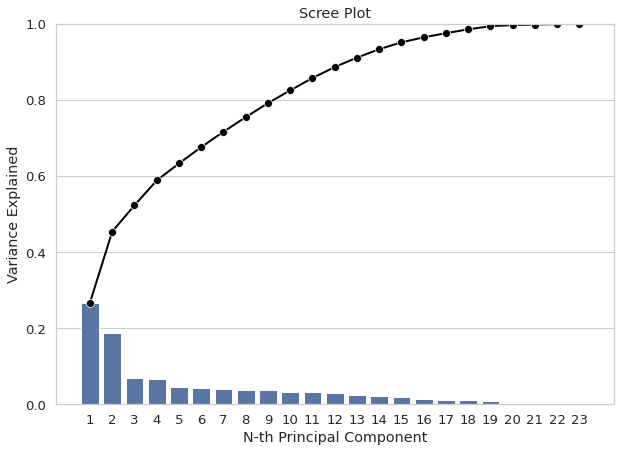

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Se revisan los 13 componentes seleccionados y su relación con cada una de las features del dataset

In [51]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = pca_df.columns
                                )
pcsComponents_dfX.iloc[:, :13]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
X1,0.194634,0.218072,0.059256,0.071343,-0.137068,-0.268666,-0.301190,-0.077962,0.025586,0.003400,0.005893,0.011048,0.308941
X2,-0.007795,0.026413,0.008451,-0.089301,0.867110,-0.409053,-0.113649,-0.068054,-0.009113,0.023538,0.025640,-0.003290,0.199295
X3,-0.028634,-0.090744,-0.310231,0.299559,0.300372,0.242805,0.585500,0.232456,-0.093639,0.015078,-0.291304,0.013895,0.029069
X4,-0.024243,-0.013114,0.366828,-0.500624,-0.071333,0.203687,0.277104,0.117369,-0.050508,0.018606,-0.148556,0.023786,0.668475
X5,0.041195,0.025435,-0.374578,0.533347,-0.161351,-0.012828,-0.134170,-0.044891,-0.000170,0.004873,0.000440,0.007539,0.622292
X6,0.066393,-0.359673,0.031790,0.040158,-0.021848,-0.098432,0.186196,0.031126,0.075406,0.120758,0.451511,0.030572,0.049015
X7,0.055898,-0.380387,0.031955,0.035914,-0.046900,-0.136239,0.169799,0.018630,0.099247,0.127876,0.416575,0.056357,0.055131
X8,0.052499,-0.392575,0.084048,0.057571,-0.029237,-0.093288,0.044293,-0.010565,0.016185,-0.026926,0.148385,-0.189853,0.069779
X9,0.052846,-0.400165,0.115927,0.078009,-0.012616,-0.046935,-0.121321,0.004631,-0.072353,-0.148718,-0.161487,0.025610,0.038297
X10,0.058607,-0.391065,0.135220,0.079134,0.006036,0.013958,-0.220626,-0.033616,-0.115600,0.002739,-0.346373,0.029729,-0.020190


Utilizamos valores absolutos para evitar problemas con signos y se prosigue a crear un set de datos únicos de los features que se ven que son los más representativos en cada uno de los componentes (los tres mayores de cada componente, en específico).

In [52]:
largest_features_pcs = list()

for column in pcsComponents_dfX.iloc[:, :13]:
  largest_features_pcs.append(np.abs(pcsComponents_dfX.loc[:, column]).nlargest(3))

relevant_features_pcs = pd.concat(largest_features_pcs).index.unique().sort_values()
print(relevant_features_pcs)

Index(['X1', 'X10', 'X11', 'X14', 'X15', 'X16', 'X18', 'X19', 'X2', 'X20',
       'X21', 'X22', 'X23', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'],
      dtype='object')


Se obtiene que X12, X13 y X17 no son tan relevantes para el análisis y, en teoría, debería de haber posibilidad de retirarlos del dataset sin afectar significativamente a los resultados.

In [53]:
np.abs(pcsComponents_dfX.iloc[:, :13].mean(axis=1)).sort_values(ascending=False)

X19    0.146921
X20    0.109298
X22    0.070318
X3     0.069553
X23    0.068648
X21    0.068002
X4     0.066729
X10    0.061696
X11    0.057620
X9     0.049867
X6     0.046382
X5     0.039010
X7     0.038758
X2     0.034630
X15    0.031020
X16    0.029298
X14    0.026792
X8     0.020745
X18    0.020578
X12    0.016494
X1     0.008714
X13    0.008667
X17    0.004036
dtype: float64

Se crea un biplot para analizar los datos contra PC1 y PC2

In [58]:
pca_y = y[y.index.isin(pca_df.index)]

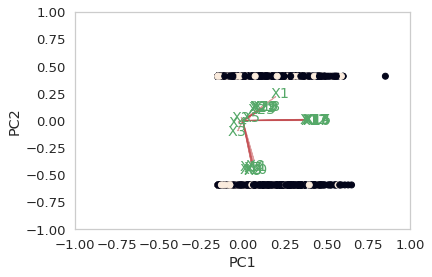

In [62]:
"""

Función "biplot" basada de: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

"""

def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c = pca_y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "X"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(preprocessing.scale(pca_df)[:,0:2], pcs.components_[0:2, :].transpose())
plt.show()

Se ve en la gráfica creada que hay puntos que no siguen el orden de los demás datos, además de que se ve como la mayoría de las variables tienen tendencias parecidas entre si, dejando a destacar alrededor de 3 grupos:

1. El que afecta a PC1 de manera positiva y nada a PC2.
2. El que afecta un poco a PC1 y PC2 en dirección positiva.
3. El que afecta a PC2 en dirección negativa y casi nada a PC1.

Parte 2
---


1. ¿Cuál es el número de componentes mínimo y por qué?
> En este ejemplo, se optaron por 13 componentes ya que estos representan el 90% de la variabilidad de los datos. Sin embargo, se podrían tomar más o menos componentes dependiendo de lo que busque el data scientist.
2. ¿Cuál es la variación de los datos que representan esos componentes?
> Se llega a ~91.1% con 13 componentes. Si se toma uno menos, todavía se obtendría un valor aceptable de ~88.6%, pero se optó manejar un target de >90% de la variabilidad para este ejercicio.
3. ¿Cuál es la pérdida de información después de realizar PCA?
> Se eliminarían 3 de las columnas de la base de datos original, las cuales serían X12, X13 y X17 (2 columnas más si se cuenta a ID y Y).
4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
> Según un cálculo de los promedios de los coeficientes hechos en los resultados finales, se encontró que los que tienen mayor importancia son: X19, X20, X22, X3 y X23. Mientras que los que tienen menor importancia son X18, X12, X1, X13 y X17.
5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
> Entre los casos de uso principales donde un PCA se ve necesario hacer es cuando los sets de datos tienen muchas features (o columnas) y se desea reducir la cantidad de datos a alimentar a los modelos, ya sea para ayudar en el desempeño del mismo, para reducir los tiempos de entrenamiento o los costos de almacenamiento de los datos. De esta manera, se puede tener un mayor nivel de seguridad de que se está retirando información de los sets de datos que no sean críticas para el análisis que se llevará a cabo.